<h2>Importing libraries</h2>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('wordnet')
from nltk import WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words("english")
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Word predictor/abcnews.csv')

In [ ]:
df.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


<h3> Randomly Sampling 150000 datapoints from the dataframe

Note:- I am using google colab with 12gb of ram ,it can't load the complete dataset for categorical conversion,so I need to take a sample of data

In [ ]:
df=df.sample(n=17000)

In [ ]:
df.head(3)

,publish_date,headline_text
281018,20070122,leave flags at home
403831,20080814,aussie judoka sent packing
484747,20090828,interview neil henry


In [ ]:
df.shape

(17000, 2)

In [ ]:
#Resetting the index
df.reset_index(inplace=True)

In [ ]:
#Dropping the old index
df.drop(columns=['index'],inplace=True)

In [ ]:
itr=10
for i in range(itr):
  print(df['headline_text'][i])

leave flags at home
aussie judoka sent packing
interview neil henry
how the heavens opened up to save hard hit wa farmers
gayle woodford extra police resources outback nurse murder case
christmas crops come in
a housing downturn could stunt bank growth
tuna industry worse off under tpp
interview craig fitzgibbon
lnp and crossbench mps unite to push bill to increase parliament


<h2>Converting the date in proper format</h2>

In [ ]:
df['publish_date']=pd.to_datetime(df['publish_date'],format='%Y%m%d')

In [ ]:
df.head()

,publish_date,headline_text
0,2007-01-22,leave flags at home
1,2008-08-14,aussie judoka sent packing
2,2009-08-28,interview neil henry
3,2017-09-28,how the heavens opened up to save hard hit wa ...
4,2016-03-28,gayle woodford extra police resources outback ...


In [ ]:
df.shape

(17000, 2)

<h2> Visualizing the text</h2>

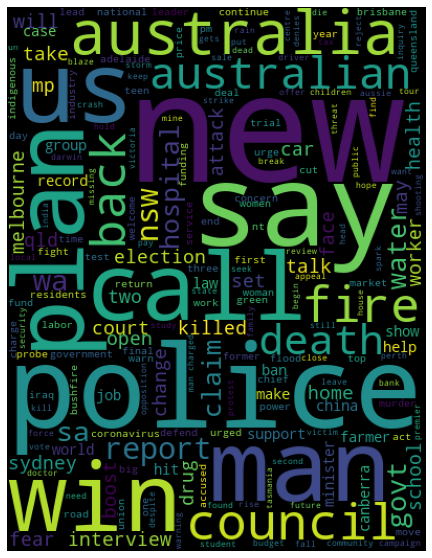

In [ ]:
#Visualizing the Most repeating words
from wordcloud import WordCloud
plt.figure(figsize=(10,10))
Cloud_img=WordCloud(background_color='black',height=520,width=400).generate(' '.join(df['headline_text']))
plt.imshow(Cloud_img)
plt.axis('off')
plt.show()

<h2>Preprocessing the text<h2>

In [ ]:
#Preprocessing the text
def cleaning(text):
  clean_list=[]
  wl=WordNetLemmatizer()
  #Tokenizing the words
  word_tokens=re.split(' ',text)
  for i in word_tokens:
    #Removing the punctuations
    small=i.lower()
    punc_remov=re.sub('^a-zA-z',' ',small)
    if punc_remov not in sw:
      clean_list.append(wl.lemmatize(punc_remov))
  clean_text=' '.join(clean_list)
  return clean_text

In [ ]:
#Cleaned headline
df['Cleaned_headline']=df['headline_text'].apply(cleaning)

In [ ]:
df

,publish_date,headline_text,Cleaned_headline
0,2007-01-22,leave flags at home,leave flag home
1,2008-08-14,aussie judoka sent packing,aussie judoka sent packing
2,2009-08-28,interview neil henry,interview neil henry
3,2017-09-28,how the heavens opened up to save hard hit wa ...,heaven opened save hard hit wa farmer
4,2016-03-28,gayle woodford extra police resources outback ...,gayle woodford extra police resource outback n...
...,...,...,...
16995,2012-03-26,man hospitalised after mine gas exposure,man hospitalised mine gas exposure
16996,2008-06-23,qantas engineers start strike action,qantas engineer start strike action
16997,2010-03-09,schoolboy sumo tipped to crush opponents,schoolboy sumo tipped crush opponent
16998,2011-02-10,police hunt armed post office robbers,police hunt armed post office robber


In [ ]:
#Dropping the headline column
df.drop(columns=['headline_text','publish_date'],inplace=True)

In [ ]:
#printing the 10 headlines
df['Cleaned_headline'][0:10]

0                                      leave flag home
1                           aussie judoka sent packing
2                                 interview neil henry
3                heaven opened save hard hit wa farmer
4    gayle woodford extra police resource outback n...
5                                  christmas crop come
6             housing downturn could stunt bank growth
7                              tuna industry worse tpp
8                           interview craig fitzgibbon
9    lnp crossbench mp unite push bill increase par...
Name: Cleaned_headline, dtype: object

<h2>Visualizing the cleaned text</h2>

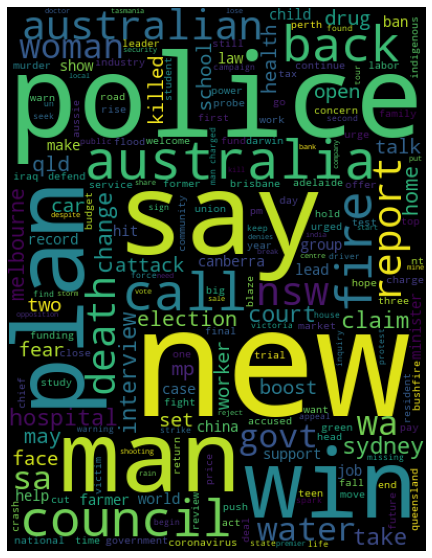

In [ ]:
#Visualizing the Most repeating words
from wordcloud import WordCloud
plt.figure(figsize=(10,10))
Cloud_img=WordCloud(background_color='black',height=520,width=400).generate(' '.join(df['Cleaned_headline']))
plt.imshow(Cloud_img)
plt.axis('off')
plt.show()

<h2>One hot encoding</h2>
Note :- We won't use this method because we also need to decode the text after prediction which is not possible while using this

In [ ]:
# vocabulary=10000

In [ ]:
# encoded_vec=[]
# for text in df['Cleaned_headline']:
#   encoded_vec.append(one_hot(text,n=vocabulary))

In [ ]:
# print(f"one hot encoded vector{encoded_vec[0:10]}")

<h3>One hot encoding using tokenizer</h3>

In [ ]:
#Creating an object of tokenizer
tokenizer_obj=Tokenizer()
#Fitting the tokenizer on the words present in headline column which will be used as vocabulary later
tokenizer_obj.fit_on_texts(df['Cleaned_headline'])


In [ ]:
#One hot encoded diztionary
tokenizer_obj.word_index

{'police': 1,
 'new': 2,
 'man': 3,
 'say': 4,
 'u': 5,
 'plan': 6,
 'court': 7,
 'call': 8,
 'australia': 9,
 'council': 10,
 'fire': 11,
 'win': 12,
 'govt': 13,
 'australian': 14,
 'back': 15,
 'death': 16,
 'nsw': 17,
 'woman': 18,
 'crash': 19,
 'interview': 20,
 'report': 21,
 'wa': 22,
 'sydney': 23,
 'water': 24,
 'qld': 25,
 'face': 26,
 'charged': 27,
 'health': 28,
 'sa': 29,
 'change': 30,
 'child': 31,
 'car': 32,
 'world': 33,
 'year': 34,
 'home': 35,
 'get': 36,
 'claim': 37,
 'election': 38,
 'melbourne': 39,
 'hospital': 40,
 'school': 41,
 'market': 42,
 'murder': 43,
 'take': 44,
 'south': 45,
 'set': 46,
 'day': 47,
 'drug': 48,
 'hit': 49,
 'two': 50,
 'killed': 51,
 'may': 52,
 'open': 53,
 'charge': 54,
 'cup': 55,
 'job': 56,
 'government': 57,
 'cut': 58,
 'attack': 59,
 'national': 60,
 'service': 61,
 'farmer': 62,
 'coast': 63,
 'minister': 64,
 'final': 65,
 'worker': 66,
 'first': 67,
 'case': 68,
 'boost': 69,
 'fear': 70,
 'one': 71,
 'mp': 72,
 'urged'

In [ ]:
#Defining the vocab size
vocabulary_size=len(tokenizer_obj.word_index)
print(f'The vocabulary size is {vocabulary_size}')

The vocabulary size is 14907


In [ ]:
#Encoding the headline
encoded_vec=[]
for text in df['Cleaned_headline']:
  encoded_vec.append(tokenizer_obj.texts_to_sequences([text])[0])

In [ ]:
print(f"Encoded vector :- {encoded_vec[0]}")
print(f"Text :- {df['Cleaned_headline'][0]}")

Encoded vector :- [459, 1020, 35]
Text :- leave flag home


In [ ]:
encoded_vec

[[459, 1020, 35],
 [167, 7506, 1495, 2950],
 [20, 4122, 1742],
 [4123, 2951, 364, 1380, 49, 22, 62],
 [5229, 7507, 794, 1, 1021, 441, 732, 43, 68],
 [480, 481, 651],
 [223, 2595, 91, 2067, 200, 863],
 [2596, 122, 2952, 4124],
 [20, 2597, 4125],
 [1743, 7508, 72, 2598, 155, 261, 520, 429],
 [288, 205, 397, 30],
 [31, 442, 5230, 7509, 98, 40],
 [7510, 5231, 47],
 [3439, 2953, 3440],
 [112, 63, 1601, 168, 173, 443, 6],
 [4126, 2954, 864, 44],
 [5232, 106, 289, 795, 2302],
 [7511, 7512, 3441, 3442],
 [444, 190, 2, 40, 6],
 [3443, 277, 37, 617, 136, 618, 2599],
 [143, 865, 1744, 5233, 380],
 [10, 6, 2, 24, 7513],
 [4127, 1022, 1130],
 [7514, 594, 917, 7515, 7516, 1745],
 [445, 796, 186, 5234, 3444, 1131, 43, 1381],
 [40, 123, 2068],
 [7517, 1200, 1066, 365, 398, 1132],
 [559, 1602, 1292, 17, 2303, 409],
 [45, 14, 733, 1496, 696],
 [1293, 62, 374, 4128, 1133],
 [5235, 83, 1746, 1603, 33, 55, 1382],
 [5236, 327],
 [3445, 1131, 1294, 2069, 2070, 1383, 85],
 [2071, 87, 697, 129, 117, 64],
 [751

<h2> Padding the one hot encoded vectors</h2>

In [ ]:
#Adding pre padding to the one hot encoded vectors to make them same size as the maximum vector
#Getting the max length of the one hot encoded vector
max_len_vec=0
for values in encoded_vec:
  if len(values)>max_len_vec:
    max_len_vec=len(values)

In [ ]:
print(f'max length of vector {max_len_vec}')

max length of vector 11


In [ ]:
padded_vec=pad_sequences(encoded_vec,maxlen=max_len_vec,padding='pre')

In [ ]:
print(f"The padded vector is :- {padded_vec}")

The padded vector is :- [[   0    0    0 ...  459 1020   35]
 [   0    0    0 ... 7506 1495 2950]
 [   0    0    0 ...   20 4122 1742]
 ...
 [   0    0    0 ... 1785 2094 3026]
 [   0    0    0 ...  434  621 1752]
 [   0    0    0 ... 5040 1214 2851]]


<h3>Creating the target variable</h3>

In [ ]:
x=padded_vec[:,0:-1]
y=padded_vec[:,-1]

In [ ]:
print(f'x={x}')
print(f'y={y}')

x=[[    0     0     0 ...     0   459  1020]
 [    0     0     0 ...   167  7506  1495]
 [    0     0     0 ...     0    20  4122]
 ...
 [    0     0     0 ... 14907  1785  2094]
 [    0     0     0 ...  1126   434   621]
 [    0     0     0 ...  1534  5040  1214]]
y=[  35 2950 1742 ... 3026 1752 2851]


In [ ]:
y_cat=to_categorical(y,num_classes=vocabulary_size)

<h3>Train Test Splitting</h3>

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y_cat,test_size=0.20,random_state=42)

In [ ]:
print(f'X_train shape{x_train.shape}')
print(f'X_test shape{x_test.shape}')
print(f'y_train shape{y_train.shape}')
print(f'y_test shape{y_test.shape}')

X_train shape(13600, 10)
X_test shape(3400, 10)
y_train shape(13600, 14907)
y_test shape(3400, 14907)


<h3>Creating the model</h3>

In [ ]:
model=keras.Sequential()
#Embedding layer
#input_dim is vocabulary_size + 1 because 0 is not considered when calculating vocab size
model.add(keras.layers.Embedding(input_dim=vocabulary_size+1,output_dim=20,input_length=max_len_vec-1,))#Bcz we have taken the last value as target label
model.add(keras.layers.Bidirectional(keras.layers.LSTM(100,return_sequences=True)))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(100)))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units=100,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units=vocabulary_size,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 20)            298160    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 200)           96800     
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 200)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200)               240800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)              

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=30,validation_data=(x_test,y_test))

Epoch 1/30
425/425 [==============================] - 25s 44ms/step - loss: 8.6661 - accuracy: 0.0065 - val_loss: 8.4112 - val_accuracy: 0.0071
Epoch 2/30
425/425 [==============================] - 15s 36ms/step - loss: 7.9885 - accuracy: 0.0073 - val_loss: 8.4991 - val_accuracy: 0.0050
Epoch 3/30
425/425 [==============================] - 13s 31ms/step - loss: 7.7799 - accuracy: 0.0072 - val_loss: 8.6343 - val_accuracy: 0.0065
Epoch 4/30
425/425 [==============================] - 13s 32ms/step - loss: 7.6464 - accuracy: 0.0073 - val_loss: 8.7933 - val_accuracy: 0.0065
Epoch 5/30
425/425 [==============================] - 13s 31ms/step - loss: 7.5535 - accuracy: 0.0070 - val_loss: 8.9799 - val_accuracy: 0.0068
Epoch 6/30
425/425 [==============================] - 15s 36ms/step - loss: 7.4759 - accuracy: 0.0076 - val_loss: 9.0434 - val_accuracy: 0.0059
Epoch 7/30
425/425 [==============================] - 13s 31ms/step - loss: 7.4027 - accuracy: 0.0074 - val_loss: 9.3479 - val_accuracy:

<h3>Checking Predictions</h3>

In [ ]:
def predict_next_word(seed_text):
  cleaned_text=cleaning(seed_text)
  token_list = tokenizer_obj.texts_to_sequences([cleaned_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_len_vec-1, padding='pre')
  prediction = model.predict(token_list)
  predictions=np.argmax(prediction)
  predicted_word=tokenizer_obj.sequences_to_texts([[predictions]])[0]
  return seed_text+' '+predicted_word

In [ ]:
predict_next_word('Today is a')

'Today is a singapore'

<h3>Sentence generation</h3>

In [ ]:
def predict_next_word(seed_text):
  cleaned_text=cleaning(seed_text)
  token_list = tokenizer_obj.texts_to_sequences([cleaned_text])[0]
  token_list = pad_sequences([token_list], maxlen=max_len_vec-1, padding='pre')
  prediction = model.predict(token_list)
  predictions=np.argmax(prediction)
  predicted_word=tokenizer_obj.sequences_to_texts([[predictions]])[0]
  return predicted_word

In [ ]:
sent='India is a rich country in'
next_words=10
for i in range(next_words):
  prediction_sent=predict_next_word(sent)
  sent=sent+' '+prediction_sent
print(sent)

India is a rich country in plant online permit permit decade close day show future highlight
